# Tampa Real-Estate Recommender
## Exploratory Data Analysis
TB Real Estate Corporation is a real estate investment firm in the Tampa Bay, Florida area.  The real estate market in the Tampa Bay area is very active.  Single family homes are selling quickly.  TB Real Estate Corporation needs to be able to assess the value of homes coming onto the market quickly and accurately so that they can beat the competition in making a competitive offer.   They need to be able to evaluate the listing price against the predicted sale price in order to identify properties that may be priced below market value and would make good investments.  
<br>
The objective of the EDA is to identify which features are the best predictors of sales price for residential properties.

# 1 Imports and File Locations<a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# suppress future warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [3]:
ext_data = '../data/external/'
raw_data = '../data/raw/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

# 2 Read Sales data into dataframe<a id='2'></a>

In [4]:
sales_df = pd.read_csv(interim_data + 'sales_df.csv')
sales_df.head()

C:\Users\mkars\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26,27,28,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FOLIO,DOR_CODE,S_DATE,VI,QU,REA_CD,S_AMT,S_TYPE,ORIG_SALES_DATE,SITE_ADDR,...,BASE,ACREAGE,NBHC,MUNICIPALITY_CD,SECTION_CD,TOWNSHIP_CD,RANGE_CD,LAND_TYPE_ID,BLOCK_NUM,LOT_NUM
0,80100,100,1987-08-01,I,Q,01,50000.0,WD,1985-11-01,19859 ANGEL LN,...,2016,5.058780,211007.0,U,1,27,17,001,000000,00001.1
1,80100,100,1985-11-01,V,Q,01,24000.0,WD,1985-11-01,19859 ANGEL LN,...,2016,5.058780,211007.0,U,1,27,17,001,000000,00001.1
2,90100,100,2021-10-27,I,Q,01,750000.0,WD,1973-01-01,19913 ANGEL LN,...,1973,4.438490,211007.0,U,1,27,17,001,000000,00002.1
3,90100,100,1997-05-01,I,Q,01,169900.0,WD,1973-01-01,19913 ANGEL LN,...,1973,4.438490,211007.0,U,1,27,17,001,000000,00002.1
4,100000,100,1988-06-01,I,Q,01,52500.0,WD,1977-12-01,6934 W COUNTY LINE RD,...,1994,0.992559,211007.0,U,1,27,17,001,000000,00003.0


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847102 entries, 0 to 847101
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FOLIO            847102 non-null  int64  
 1   DOR_CODE         847102 non-null  int64  
 2   S_DATE           847102 non-null  object 
 3   VI               847102 non-null  object 
 4   QU               847102 non-null  object 
 5   REA_CD           847102 non-null  object 
 6   S_AMT            847102 non-null  float64
 7   S_TYPE           847102 non-null  object 
 8   ORIG_SALES_DATE  847102 non-null  object 
 9   SITE_ADDR        847013 non-null  object 
 10  SITE_CITY        847095 non-null  object 
 11  SITE_ZIP         847102 non-null  object 
 12  tBEDS            847102 non-null  float64
 13  tBATHS           847102 non-null  float64
 14  tSTORIES         847102 non-null  float64
 15  tUNITS           847102 non-null  float64
 16  tBLDGS           847102 non-null  floa

## Target Feature - Sales Price (S_AMT)

**S_AMT** is the sale price of the property.  This will be the target feature to predict.

In [6]:
print(sales_df['S_AMT'].describe().apply(lambda x: format(x, 'f')))

count      847102.000000
mean       198455.618730
std        393473.738058
min          1100.000000
25%         76600.000000
50%        142000.000000
75%        235000.000000
max      26433000.000000
Name: S_AMT, dtype: object


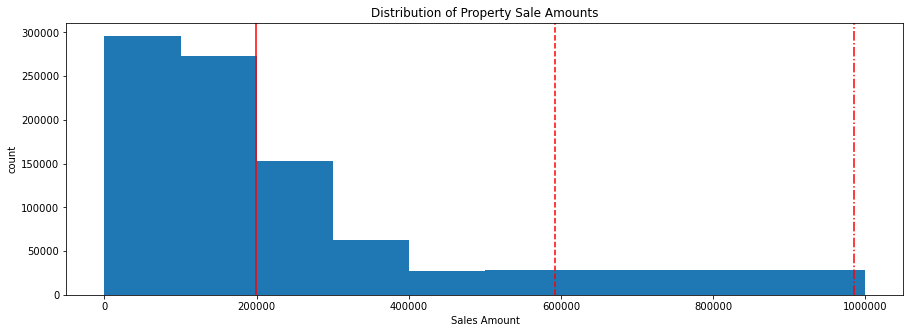

In [7]:
S_AMT_mean = sales_df['S_AMT'].mean()
S_AMT_std = sales_df['S_AMT'].std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=sales_df, x='S_AMT', bins=[0, 100000, 200000, 300000, 400000, 500000, 1000000])
_ = plt.xlabel('Sales Amount')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Property Sale Amounts')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(S_AMT_mean, color='r')
_ = plt.axvline(S_AMT_mean+S_AMT_std, color='r', linestyle='--')
_ = plt.axvline(S_AMT_mean+(2*S_AMT_std), color='r', linestyle='-.')

## Sales Date

**S_DATE** is the date of the sale.  Property sales increased sharply from the mid-1990's to the mid-2000's when the U.S. mortgage crisis crashed the housing market.  Over the 2010's the annual number of property sales increased to near the levels prior to the crash.  

In [8]:
sales_df['S_DATE'] = pd.to_datetime(sales_df['S_DATE'])

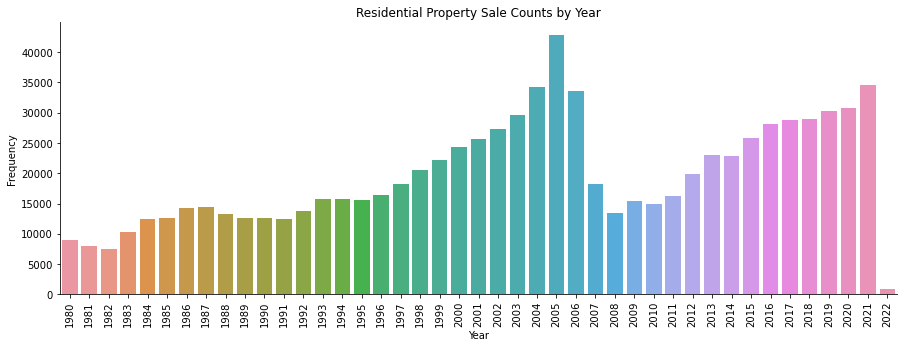

In [9]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=sales_df['S_DATE'].dt.year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Year')
sns.despine()
plt.show()

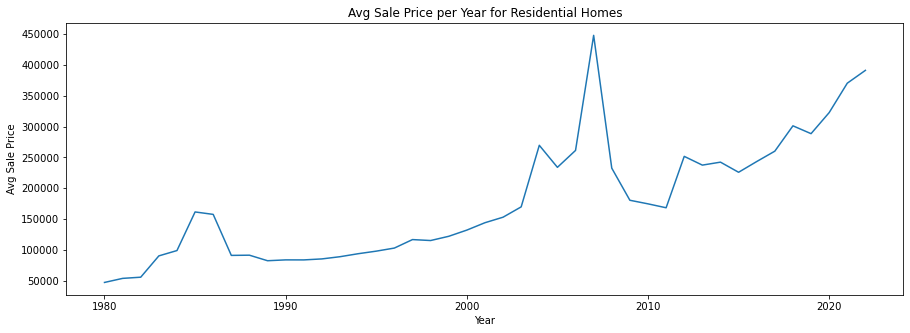

In [10]:
plt.subplots(figsize=(15, 5))
sales_df.groupby(sales_df['S_DATE'].dt.year)['S_AMT'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price per Year for Residential Homes')
plt.show()

Sales data prior to 2021 is excluded as market conditions such as the mid-2000's real-estate crisis can influence price.  In order to predict current market values, we will focus on the most current year of sales data.

In [11]:
df = sales_df[sales_df['S_DATE'] >= '2021-01-01']

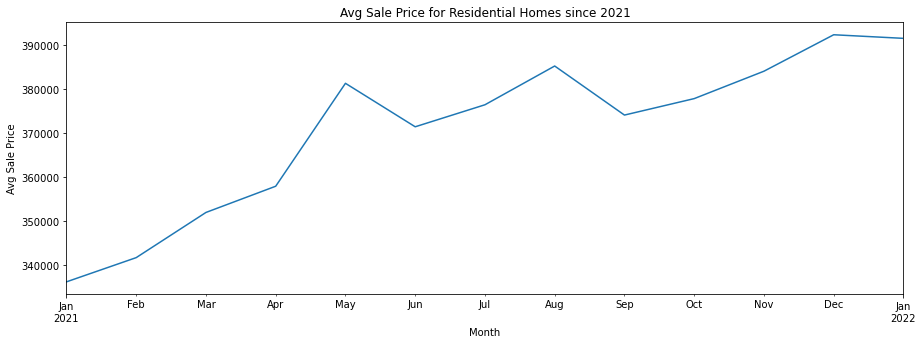

In [12]:
plt.subplots(figsize=(15, 5))
df.groupby(df['S_DATE'].dt.to_period('M'))['S_AMT'].mean().plot()
plt.xlabel('Month')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price for Residential Homes since 2021')
plt.show()

**DOR Code** is the Department of Revenue Code which indicates the type of property (i.e. single family home, condo, commercial, etc.)  The data has already been filtered for the following residential property types.
- 0100: Single Family Residential
- 0102: Single family home built around a mobile home
- 0106: Townhouse/Villa
- 0200: Mobile Home
- 0400: Condominium
- 0408: Mobile Home Condominium
- 0800: Multi-Family Residential (Duplex, Triplex, Quadplex, etc.) < 10 units
- 0801: Multi-Family Residential (units individually owned)
- 0802: Multi-Family Residential (units rentals)

In [13]:
df['DOR_CODE'].value_counts()

100    26375
106     4492
400     3825
200      441
800      273
408       20
801        4
102        2
Name: DOR_CODE, dtype: int64

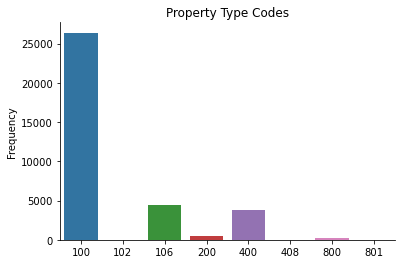

In [14]:
sns.countplot(data=df, x='DOR_CODE')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Property Type Codes')
sns.despine()
plt.show()

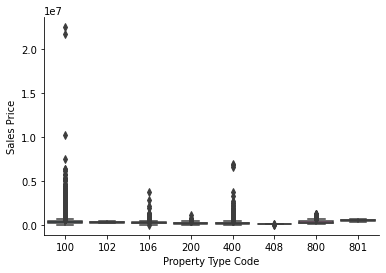

In [15]:
sns.boxplot(data=df,
            x='DOR_CODE',
            y='S_AMT')
plt.xlabel('Property Type Code')
plt.ylabel('Sales Price')
sns.despine()
# plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

## Location, Location, Location!! 

In [16]:
df['MARKET_AREA_CD'] = df['NBHC'].astype(str).str[1:3]

## Drop Unnecessary Data

**FOLIO** is a unique identifier for a property.  It will not impact the sales price and can be dropped from the analysis.

In [17]:
df['FOLIO'].astype(str).describe()

count          35432
unique         34549
top       1371380000
freq               4
Name: FOLIO, dtype: object

In [18]:
df.drop('FOLIO', axis=1, inplace=True)

## Correlation

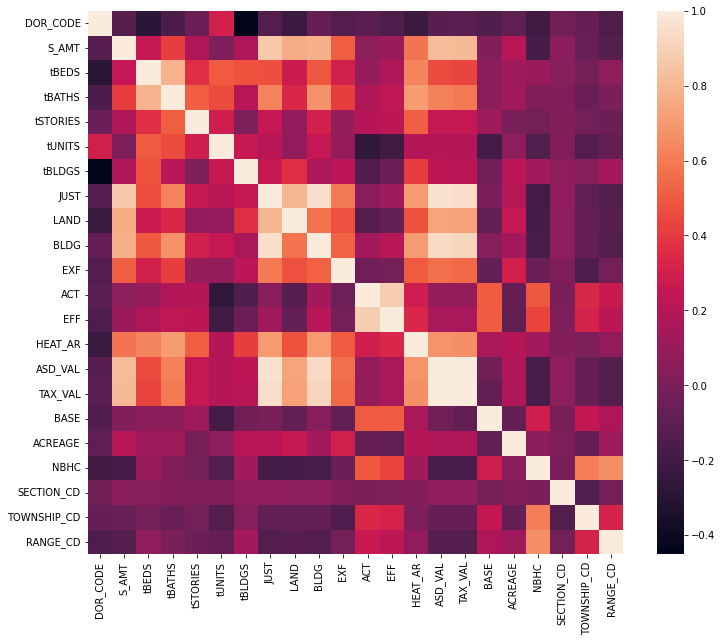

In [19]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());